## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0,'..')
import FeatureEngineering_Module as fe
import Imputation_Module as imp

import warnings
warnings.filterwarnings(action="ignore")

## Data

In [2]:
train = pd.read_csv("../train.csv", index_col = "Id")
test = pd.read_csv("../test.csv", index_col = "Id")

## Missingness

In [3]:
train, test = imp.impute_data()

Number of rows with NaN: 1460 

Columns with NaN:
 Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
------------------------------
Number of rows with NaN: 1459 

Columns with NaN:
 MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageCars    

## Feature Engineering

In [4]:
# apply feature enginerring modules
train = fe.feat_engineering(train)
test = fe.feat_engineering(test)

In [5]:
# one hot encoding
train, test = fe.one_hot_encoding(train, test)

In [6]:
train.shape, test.shape

((1460, 176), (1459, 175))

### removing outliers

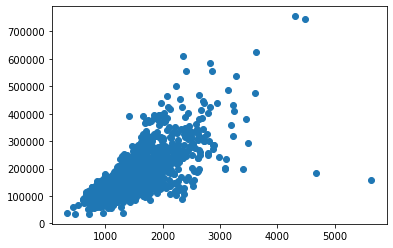

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.show()

In [8]:
train.drop(train[train["GrLivArea"] > 4000].index, inplace=True)